# Spam Email Classification: A Practical Approach to Binary Classification

Email is one of the most widely used communication tools today, but it is also a common target for unsolicited and harmful messages. Detecting spam emails is an essential task to enhance privacy and improve user experience. This project focuses on classifying emails as either spam or legitimate (ham) using a combined dataset derived from two renowned sources: the **2007 TREC Public Spam Corpus** and the **Enron-Spam Dataset**.

### About the Dataset

The dataset used in this project consists of **83,446 email records** labeled as either:
- **Spam (`1`)**: Unsolicited or harmful messages.
- **Ham (`0`)**: Legitimate email content.

Each record includes:
1. **Label**: Indicates whether the email is spam or not.
2. **Text**: The actual content of the email.

### Data Sources

The dataset combines information from:
- [2007 TREC Public Spam Corpus](https://plg.uwaterloo.ca/~gvcormac/treccorpus07/)  
  Preprocessed dataset: [Download here](https://www.kaggle.com/datasets/bayes2003/emails-for-spam-or-ham-classification-trec-2007)
- [Enron-Spam Dataset](https://www2.aueb.gr/users/ion/data/enron-spam/)  
  Preprocessed dataset: [Download here](https://github.com/MWiechmann/enron_spam_data/)

The combination and preprocessing of these datasets were accomplished using a custom script available [here](https://github.com/PuruSinghvi/Spam-Email-Classifier/blob/main/Combining%20Datasets.ipynb).

### Objective and Inspiration

This project tackles a **binary classification problem** where the goal is to differentiate between spam and ham emails. The task involves understanding the nuances of email content and leveraging machine learning models to achieve high classification accuracy. The approach draws inspiration from Ramya Vidiyala’s article, ["Detecting Spam in Emails"](https://towardsdatascience.com/spam-detection-in-emails-de0398ea3b48), which highlights effective methodologies for spam detection.

By identifying spam emails with high accuracy, this project aims to demonstrate the potential of machine learning in solving real-world challenges, such as improving email security and reducing unwanted communications.

### References

- [https://www.kaggle.com/code/hrhuynguyen/detecting-spam-in-emails-with-lstms-99-accuracy](https://www.kaggle.com/code/hrhuynguyen/detecting-spam-in-emails-with-lstms-99-accuracy)
- [https://www.kaggle.com/code/rem4000/spam-email-xgboost-99](https://www.kaggle.com/code/rem4000/spam-email-xgboost-99)

## Data Preprocessing

To prepare the dataset for spam email classification, the following libraries and tools are imported:  

- **NumPy**: For numerical operations.  
- **Pandas**: For data manipulation and handling CSV files.  
- **NLTK (Natural Language Toolkit)**: For natural language processing tasks, including tokenization and stopword removal.  
- **Regular Expressions (`re`)**: For text cleaning and pattern matching.  

Additionally, necessary NLTK resources such as stopwords and tokenizers are downloaded to enable effective text processing.


In [1]:
# Data preprocessing
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import ngrams
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


## Visualization

For exploring and visualizing the dataset, the following libraries and tools are utilized:  

- **Matplotlib**: For creating static, animated, and interactive visualizations.  
- **Collections (Counter)**: For counting occurrences of elements in the dataset, such as word frequencies.  
- **WordCloud**: For generating word cloud representations to visualize common terms in the dataset.

In [3]:
# Visualization
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

## Feature Engineering

To transform the dataset into a format suitable for machine learning models, the following libraries and tools are employed:  

- **String**: For handling string operations and text processing.  
- **Regular Expressions (`re`)**: For pattern matching and text cleaning.  
- **Keras Preprocessing**:  
  - **Tokenizer**: For converting text into sequences of tokens.  
  - **Pad Sequences**: For ensuring uniform input length by padding or truncating sequences.  
- **Scikit-learn Preprocessing**:  
  - **LabelEncoder**: For encoding target labels (spam or ham) into numerical format.  

In [20]:
# Feature Engineering
import string
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

## Machine Learning Model

The following libraries and tools are used to build, train, and evaluate the machine learning model:  

- **Scikit-learn**:  
  - **Train-Test Split**: For dividing the dataset into training and testing sets.  

- **Keras**:  
  - **Sequential**: For creating a linear stack of layers for the model.  
  - **Layers**:  
    - **Dense**: Fully connected layers for learning complex representations.  
    - **LSTM**: Long Short-Term Memory layers for capturing sequential patterns in text data.  
    - **Embedding**: For converting words into dense vector representations.  
    - **Dropout**: For regularization to reduce overfitting.  
    - **Activation**: For applying activation functions like ReLU or softmax.  
    - **Bidirectional**: For processing sequences in both forward and backward directions.  

- **TensorFlow**:  
  - As the backend for training and deploying the neural network model.

In [5]:
# Machine Learning Model
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Dropout, Activation, Bidirectional
import tensorflow as tf

## Evaluation Metric

To assess the performance of the machine learning model, the following libraries and tools are used:  

- **Scikit-learn Metrics**:  
  - **Confusion Matrix**: For visualizing true positives, true negatives, false positives, and false negatives.  
  - **F1 Score**: For evaluating the balance between precision and recall.  
  - **Precision Score**: For measuring the proportion of correctly identified positive instances.  
  - **Recall Score**: For measuring the proportion of actual positives correctly identified.  

- **Seaborn**:  
  - For creating visually appealing and informative plots, such as heatmaps for the confusion matrix.  

In [34]:
# Evaluation Metric
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
import seaborn as sns

## Load the Dataset

The dataset is loaded into a DataFrame for further analysis. In this dataset:

- **`1`** indicates that the email is classified as **spam**.
- **`0`** denotes that the email is **legitimate (ham)**.

A preview of the first few records provides an overview of the data structure and content.

In [7]:
# Load the dataset
df = pd.read_csv("combined_data.csv")
df.head(5)

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


## Check for Missing Values

To ensure the dataset is complete and ready for analysis, we check for any missing values. This step helps identify if there are any gaps in the data that need to be handled before model training.

In [8]:
print(df.isnull().sum())

label    0
text     0
dtype: int64


## Check the Shape of the Data

The shape of the dataset is examined to understand its structure, including the number of records (rows) and features (columns). This provides an overview of the dataset's size before processing.

In [9]:
df.shape

(83448, 2)

## Convert Text to Lowercase

To standardize the text data, all email content is converted to lowercase. This step helps ensure that words with different cases (e.g., "Spam" and "spam") are treated as the same during analysis.


In [10]:
df['text'] = df['text'].str.lower()

## Remove Numbers and Special Characters

Special characters, symbols, and numbers are often irrelevant for distinguishing between spam and legitimate emails. Therefore, these elements are removed to clean the text data and focus on meaningful words.

In [11]:
def remove_special_characters(word):
    return word.translate(str.maketrans('', '', string.punctuation))

df['text'] = df['text'].apply(remove_special_characters)

## Remove English Stop-Words

Common words such as "the", "a", and "of" (known as stop-words) are removed from the text since they do not add significant meaning for spam classification. By eliminating these words, we can focus on the more informative content of the emails.

In [12]:
# Define stop-words in English
ENGLISH_STOP_WORDS = set(stopwords.words('english'))

def remove_stop_words(words):
    return [word for word in words if word not in ENGLISH_STOP_WORDS]

# Tokenize the text
df['text'] = df['text'].apply(word_tokenize)

# Remove stop words
df['text'] = df['text'].apply(remove_stop_words)

# Rejoin words for EDA
df['text'] = df['text'].apply(' '.join)

## Removal of Hyperlinks

Hyperlinks (URLs) present in emails are removed, as they generally do not contribute useful information for spam classification. This step helps clean the text and focus on the actual content of the emails.

In [13]:
def remove_hyperlink(word):
    return re.sub(r"http\S+", "", word)

df['text'] = df['text'].apply(remove_hyperlink)

## Exploratory Data Analysis

To gain insights into the dataset, we perform an initial exploration by reviewing a few examples of spam emails. This helps us understand the content and structure of spam messages, providing context for the classification task.

In [14]:
for i in range (1,3):
    print("Email #"+str(i))
    spam_email = df[df['label'] == 1]['text'].iloc[i]
    print(spam_email+"\n")

Email #1
wulvob get medircations online qnb ikud viagra escapenumber escapenumber levitra escapenumber escapenumber cialis escapenumber escapenumber imitrex escapenumber escapenumber flonax escapenumber escapenumber ultram escapenumber escapenumber vioxx escapenumber escapenumber ambien escapenumber escapenumber valium escapenumber escapenumber xannax escapenumber escapenumber soma escapenumber meridia escapenumber escapenumber escapenumber escapenumber cysfrt ever stopped wonder much average man pays mediecines ap painkillers drugs improve quality life weight reducing tablets many escapenumber whats worse mediucine costs lot branded rfwur intrested http dmvrwm remunerativ net dfuaeirxygiq visit website escapenumber

Email #2
university degree obtain prosperous future money earning power prestige comes career position youve always dreamed diploma prestigious non accredited unversities based present knowledge professional experience qualify required tests classes books examinations con

## Reasons for Spam Email Classification

### Email 1: Medication Advertisements
- **Unsolicited Promotion**: This email promotes pharmaceutical products like Viagra and Cialis, a common trait of spam emails.
- **Incoherent Text**: It includes a mix of unrelated words and drug names, which is often used in spam to evade detection.
- **Suspicious URLs**: The email includes a link to a website for purchasing drugs, which is typical of spam emails aiming to direct users to unreliable sources.
- **Irregular Formatting**: The use of random characters and inconsistent spaces is a tactic often seen in spam to bypass filters.
- **Generic Content**: There is no personalization in the message, indicating it was sent to many recipients rather than being tailored to one individual.

### Email 2: Offering Degrees
- **Unrealistic Claims**: The email promises a degree without exams, assignments, or books, which is a clear sign of a scam.
- **Lack of Credibility**: There are no references to legitimate institutions or any specific details about the degree.
- **24/7 Availability**: Claims of being available all the time are suspicious, as they don't align with legitimate educational programs.
- **Vague Information**: The message lacks concrete details, further indicating it is likely spam.

### Key Characteristics of Spam Emails:
- **Unsolicited Offers**: Often push products or services without the recipient's consent.
- **Unusual or Random Language**: Spam emails often use jumbled words or phrases to avoid detection.
- **Too-Good-to-Be-True Promises**: These emails commonly include offers that are unrealistic or improbable, like instant degrees or medications.
- **Impersonal Content**: Generic emails that are not directed to a specific recipient often signal spam.
- **Suspicious Links**: These emails tend to contain links that lead to phishing sites or scams.
- **Disorganized and Unfocused**: The content is often incoherent and lacks clear structure or purpose.

## Exploring Legitimate Email Examples

To further understand the characteristics of legitimate emails, we review a few examples from the dataset. This helps distinguish the differences between spam and legitimate content.


In [15]:
for i in range (1,3):
    print("Email #"+str(i))
    legitimate_email = df[df['label'] == 0]['text'].iloc[i]
    print(legitimate_email+"\n")

Email #1
thanks answers guys know checked rsync manual would rather get escapenumber sure answer one current script bin bash rsync avt exclude alpha exclude arm exclude hppa exclude hurd exclude iaescapenumber exclude mescapenumberk exclude mips exclude mipsel exclude multi arch exclude powerpc exclude sescapenumber exclude sh exclude sparc exclude source ftp de debian org debian cd var www mirror debian cd know loads excludes include distros soon rsync manual del alias delete delete delete extraneous files dest dirs delete receiver deletes transfer default delete receiver deletes xfer delete receiver deletes transfer delete excluded also delete excluded files dest dirs delete would suggest use thanks john escapelong escapenumber escapenumber escapenumber olleg samoylov wrote jonathan escapelong wrote sorry banal question favourite keys escapenumber stage rsync rsync verbose recursive links hard links times filter r tmp delete delay updates source url destination log file olleg samoylo

## Why These Emails Are Classified as Legitimate

### Email 1: Technical Discussion
- **Relevant and Detailed Content**: The email provides in-depth, technical information about using rsync, demonstrating a focused and purposeful conversation.
- **Personalized Communication**: The email references prior messages and specific individuals, indicating it is targeted and relevant to the recipients.
- **Professional Tone**: The language is formal, technical, and appropriate for the subject matter, typical of legitimate communication.
- **Absence of Unsolicited Offers**: There are no unsolicited promotions or suspicious links, which are often seen in spam.

### Email 2: Legitimate Promotion
- **Recognized Source**: The email is from CNN, a reputable media outlet, promoting a scheduled event, which is standard practice for well-known organizations.
- **Clear and Relevant Information**: The email shares specific details about the event (an interview with Michael Moore), confirming its legitimacy.
- **Opt-in Confirmation**: The message mentions that the recipient has subscribed to receive such communications, a key indicator of a legitimate email.
- **Unsubscribe Option**: The presence of a clear option to unsubscribe ensures compliance with legitimate marketing standards.

### Key Characteristics of Legitimate Emails:
- **Relevant and Specific Content**: Legitimate emails often contain detailed, contextual information tailored to the recipient's interests or needs.
- **Personalized Communication**: These emails usually address the recipient directly or reference prior conversations, indicating a targeted approach.
- **Professional Language**: They maintain a professional tone, with coherent, purposeful content aligned to the subject matter.
- **Affiliation with Recognized Entities**: Legitimate emails often come from trusted organizations, adding credibility to the communication.
- **Clear Opt-in and Unsubscribe Options**: Legitimate marketing emails provide recipients with the option to opt-in or unsubscribe, adhering to email marketing regulations.
- **No Suspicious Links or Offers**: Unlike spam, they do not contain unsolicited offers, misleading links, or requests for sensitive information.

## Spam vs. Legitimate Email Distribution

A pie chart is used to visualize the distribution of spam and legitimate emails in the dataset.

The chart reveals that approximately **52.6%** of the emails are classified as spam, while **47.4%** are legitimate. This nearly balanced distribution is beneficial for training machine learning models, as it reduces the risk of bias towards either class, ensuring a more accurate and fair model.

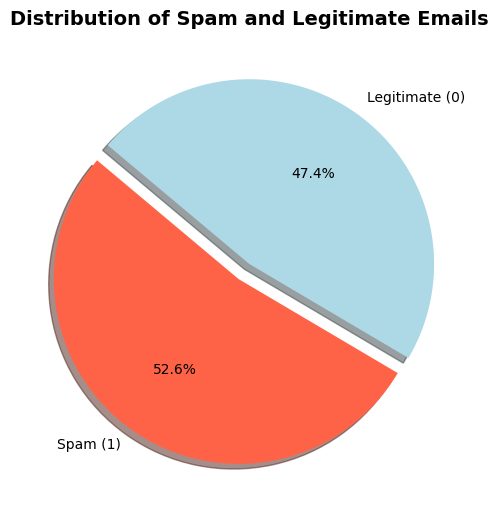

In [16]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Count the number of spam and legitimate emails
email_counts = df['label'].value_counts()

# Define labels and colors for the pie chart
labels = ['Spam (1)', 'Legitimate (0)']
colors = ['tomato', 'lightblue']

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    email_counts,
    labels=labels,
    autopct='%1.1f%%',  # Display percentage with one decimal place
    startangle=140,     # Rotate the chart for better aesthetics
    colors=colors,      # Custom colors for each category
    explode=(0.1, 0),   # Slightly "explode" the spam category for emphasis
    shadow=True         # Add shadow for a 3D effect
)

# Add a title with better formatting
plt.title('Distribution of Spam and Legitimate Emails', fontsize=14, fontweight='bold')

# Display the chart
plt.show()

## Word Frequency Analysis

A bar chart is created to compare the most frequent words found in both spam and legitimate emails. This analysis helps identify key terms that are commonly associated with each type of email.

By separating the spam and legitimate emails and counting the word frequencies, we can observe differences in the language used. This can be a valuable feature for training classification models, as certain words or phrases may be indicative of spam or legitimate content.

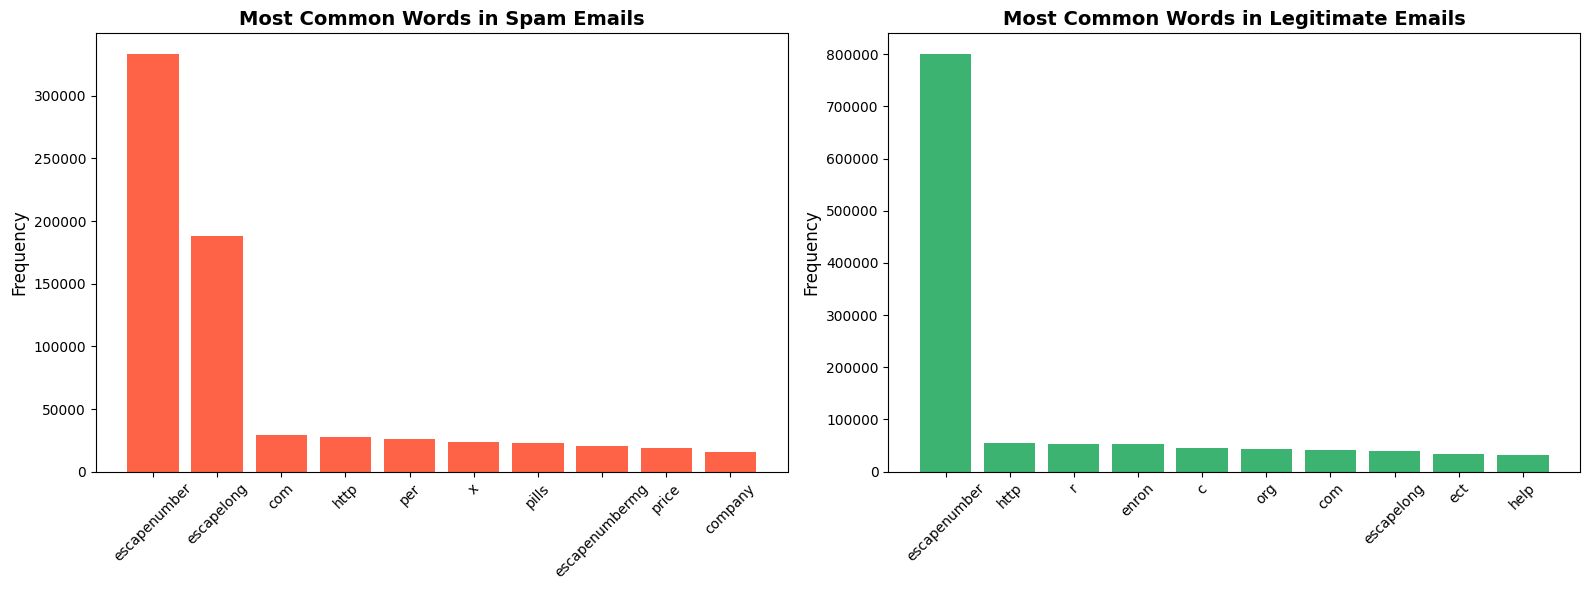

In [17]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Separate the spam and legitimate emails
spam_emails = df.loc[df['label'] == 1, 'text']
legit_emails = df.loc[df['label'] == 0, 'text']

# Define a function to count word frequencies
def count_word_frequencies(email_series):
    word_counter = Counter()
    email_series.str.split().apply(word_counter.update)
    return word_counter

# Count word frequencies for spam and legitimate emails
spam_words = count_word_frequencies(spam_emails)
legit_words = count_word_frequencies(legit_emails)

# Get the 10 most common words for each category
spam_common = spam_words.most_common(10)
legit_common = legit_words.most_common(10)

# Convert to DataFrames for visualization
spam_common_df = pd.DataFrame(spam_common, columns=['Word', 'Frequency'])
legit_common_df = pd.DataFrame(legit_common, columns=['Word', 'Frequency'])

# Set up the figure for plotting
plt.figure(figsize=(16, 6))

# Plot the most common words in spam emails
plt.subplot(1, 2, 1)
plt.bar(spam_common_df['Word'], spam_common_df['Frequency'], color='tomato')
plt.title('Most Common Words in Spam Emails', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=10)
plt.ylabel('Frequency', fontsize=12)

# Plot the most common words in legitimate emails
plt.subplot(1, 2, 2)
plt.bar(legit_common_df['Word'], legit_common_df['Frequency'], color='mediumseagreen')
plt.title('Most Common Words in Legitimate Emails', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=10)
plt.ylabel('Frequency', fontsize=12)

# Adjust layout for better visual appeal
plt.tight_layout()

# Display the plots
plt.show()

This comparison highlights the key differences in language use between spam and legitimate emails, providing insights into the vocabulary patterns that can help in distinguishing between the two types of messages.

## Word Cloud for Spam Emails

A word cloud is generated to visualize the most common words found in spam emails. This graphic representation highlights the frequency of words, with larger words appearing more often in the dataset. Word clouds provide an intuitive way to identify recurring themes or terms in spam emails.

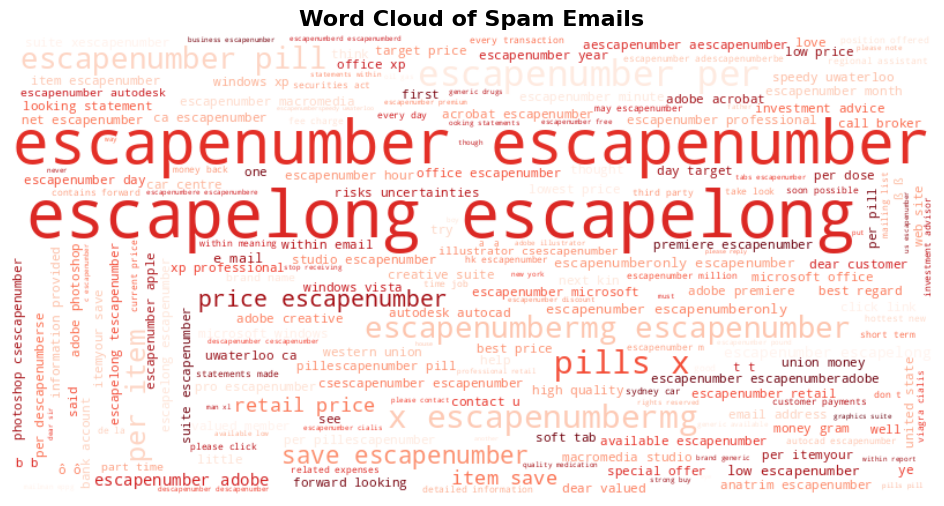

In [18]:
# Import necessary libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud image for spam words
spam_wordcloud = WordCloud(
    width=800,  # Width of the image
    height=400,  # Height of the image
    background_color='white',  # Background color for better visibility
    colormap='Reds',  # Color theme to match the spam context
    max_words=200,  # Limit the number of words to show in the cloud
    contour_color='black',  # Optional: Outline color for the word cloud
    contour_width=1  # Optional: Outline width for a polished look
).generate(' '.join(spam_emails))  # Join all spam emails into a single string

# Display the word cloud image
plt.figure(figsize=(12, 6))  # Adjust figure size for better visualization
plt.imshow(spam_wordcloud, interpolation='bilinear')  # Use bilinear interpolation for smooth display
plt.axis('off')  # Turn off axes for a clean look
plt.title('Word Cloud of Spam Emails', fontsize=16, fontweight='bold')  # Add a descriptive title
plt.show()

## N-gram Analysis

N-gram analysis is conducted to explore common sequences of two (bigrams) or more words in both spam and legitimate emails. By examining these sequences, we can better understand the frequent phrases and language patterns used in each type of email.

In this analysis, we focus on extracting and counting bigrams (two-word sequences) from the email text, providing insight into how certain word combinations are more common in spam emails compared to legitimate ones.


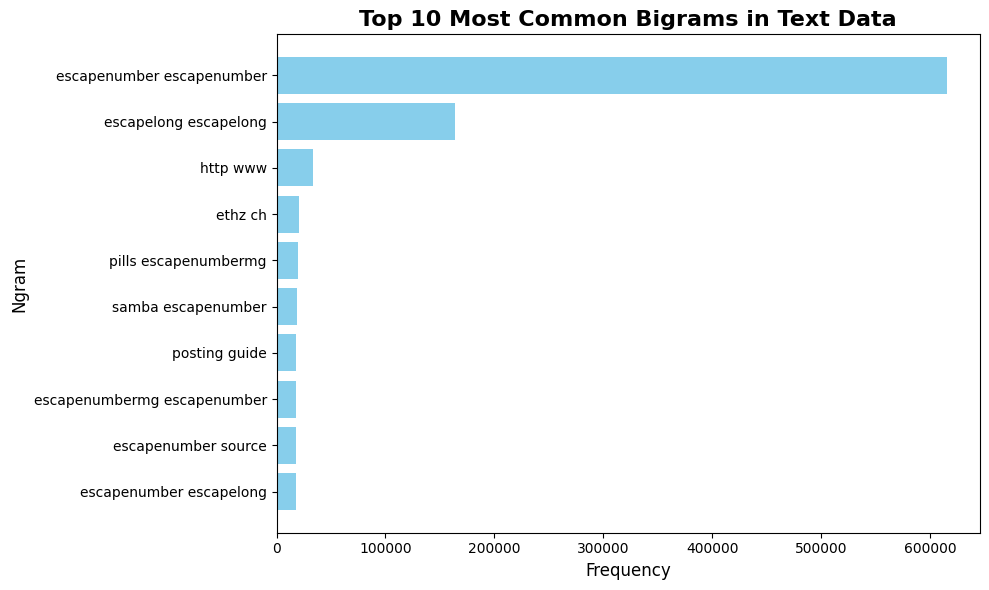

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import pandas as pd

def plot_top_ngrams(corpus, ngram_range=(2, 2), top_n=10, title='Top Ngrams', color='skyblue'):
    """
    Generate and visualize the top n-grams in a given text corpus.

    Args:
        corpus (list): List of text data to analyze.
        ngram_range (tuple): The range of n-grams to consider, e.g., (2, 2) for bigrams.
        top_n (int): The number of top n-grams to display.
        title (str): The title of the plot.
        color (str): The color of the bars in the plot.
    """
    # Create a CountVectorizer for n-grams
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    ngram_matrix = vectorizer.fit_transform(corpus)

    # Sum the occurrences of each n-gram
    ngram_counts = ngram_matrix.sum(axis=0).A1
    ngram_features = vectorizer.get_feature_names_out()

    # Create a DataFrame of n-grams and their frequencies
    ngrams_df = pd.DataFrame({'Ngram': ngram_features, 'Frequency': ngram_counts})
    ngrams_df = ngrams_df.sort_values(by='Frequency', ascending=False).head(top_n)

    # Plot the top n-grams
    plt.figure(figsize=(10, 6))
    plt.barh(ngrams_df['Ngram'], ngrams_df['Frequency'], color=color)
    plt.xlabel('Frequency', fontsize=12)
    plt.ylabel('Ngram', fontsize=12)
    plt.title(title, fontsize=16, fontweight='bold')
    plt.gca().invert_yaxis()  # Display the highest frequency at the top
    plt.tight_layout()
    plt.show()

# Example usage: Analyzing bigrams in the dataset
plot_top_ngrams(
    df['text'],
    ngram_range=(2, 2),
    top_n=10,
    title='Top 10 Most Common Bigrams in Text Data',
    color='skyblue'
)

## Feature Engineering: Data Splitting

In the feature engineering phase, the dataset is divided into features (X) and target labels (y). The features represent the email text, while the target indicates whether the email is spam (1) or legitimate (0).

In [22]:
# Split the data into features and target
X = df['text']
y = df['label']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Tokenization

Tokenization is the process of breaking down text into smaller, manageable units called tokens. These tokens serve as the input features for machine learning algorithms.

In this project, the `Tokenizer` from Keras is used to convert the email text into sequences of tokens. By setting a maximum number of features (e.g., 5000), we limit the vocabulary to only the most frequently occurring words, helping manage the size and relevance of the dataset.

After fitting the tokenizer on the training data, the email text is converted into numerical sequences that can be used by machine learning models.

In [23]:
max_features = 5000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)

# Convert texts to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [24]:
df.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get medircations online qnb ikud viagra...
2,0,computer connection cnn com wednesday escapenu...
3,1,university degree obtain prosperous future mon...
4,0,thanks answers guys know checked rsync manual ...


## Sequence Padding for Consistent Input Lengths

Padding is a technique used to ensure that all sequences of tokens have the same length. Since machine learning models process input in batches, sequences of varying lengths can cause information loss or inconsistencies during training. By padding the sequences to a uniform size, we ensure that each input is of equal length, which improves the efficiency and effectiveness of batch processing.


In [25]:
# Average Length
average_length = df['text'].apply(len).mean()
print("Average Length: "+str(average_length))

max_length = 500 # Set to average length

# Padding sequences
X_train_padded = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_length, padding='post')

Average Length: 1305.4409692263446


## Label Encoding for Target Variable

Machine learning models require the target variable to be in numerical form rather than as a string. To achieve this, label encoding is applied to the target variable, transforming the categorical labels into numeric values. The `LabelEncoder` is used to encode the target variable for both the training and test datasets, ensuring compatibility with the model.

In [26]:
# Import the LabelEncoder class from scikit-learn to encode categorical labels into numerical values.
label_encoder = LabelEncoder()

# Fit the LabelEncoder to the training data (y_train) and transform the labels into numerical values.
# The labels in y_train (e.g., 'spam' and 'ham') will be converted to integers (e.g., 1 and 0).
y_train_encoded = label_encoder.fit_transform(y_train)

# Use the fitted LabelEncoder to transform the test data labels (y_test).
# It ensures that the same encoding scheme applied to y_train is applied to y_test, ensuring consistency.
y_test_encoded = label_encoder.transform(y_test)

In [27]:
import pickle

# Save the trained LabelEncoder to a file
with open('label_encoder.pkl', 'wb') as file:
    pickle.dump(label_encoder, file)

## Model Selection: Using Bi-Directional LSTM for Text Classification

In this project, we use a Recurrent Neural Network (RNN) to classify spam and legitimate emails. RNNs are particularly effective for sequential data, as they process information by considering previous inputs, similar to how humans comprehend text by connecting ideas across sentences.

However, standard RNNs face limitations in retaining long-term dependencies. To address this, we leverage Long Short Term Memory (LSTM) networks, a specialized form of RNN that can better capture long-term context. In this case, we utilize a Bi-directional LSTM, which processes the input sequence in both directions—past to future and future to past—providing the model with a richer understanding of the text and improving its ability to classify emails accurately.

In [28]:
# Define the length of the embedding vectors (32-dimensional)
embedding_vector_length = 32

# Initialize a Sequential model in Keras
model = tf.keras.Sequential()

# Add an embedding layer:
# This converts input sequences of integers into dense vectors of fixed size (32).
# `max_features` is the maximum number of words to consider in the vocabulary.
# `embedding_vector_length` defines the size of the vector for each word.
# `input_length` is the length of input sequences.
model.add(Embedding(input_dim=max_features,  # Total number of words in the dataset
                    output_dim=embedding_vector_length,  # Length of the embedding vector
                    input_length=max_length))  # Length of each input sequence

# Add a Bidirectional LSTM layer:
# LSTM (Long Short-Term Memory) is used to process sequences of data, and the 'Bidirectional' wrapper
# allows the network to process the sequence in both forward and backward directions.
# `64` defines the number of LSTM units.
model.add(Bidirectional(tf.keras.layers.LSTM(64)))

# Add a Dense fully-connected layer with 16 neurons and ReLU activation:
# This layer introduces non-linearity and allows the model to capture more complex patterns.
model.add(Dense(16, activation='relu'))

# Add a Dropout layer to prevent overfitting:
# Dropout randomly sets a fraction of input units to 0 at each update during training to prevent overfitting.
# The dropout rate is set to 10% (0.1).
model.add(Dropout(0.1))

# Add the output layer with 1 neuron:
# The final layer uses the sigmoid activation function to output a value between 0 and 1, suitable for binary classification.
model.add(Dense(1, activation='sigmoid'))

# Compile the model:
# We use binary crossentropy as the loss function for binary classification problems.
# The optimizer is set to Adam, which is an efficient optimization algorithm.
# 'accuracy' is used as the metric to evaluate the performance during training and evaluation.
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Display the model architecture summary to show all layers and their parameters
print(model.summary())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


## Model Training and Evaluation

The model is trained on the padded training data with a batch size of 512 and over 20 epochs. Throughout the training process, the loss decreases steadily, and the accuracy surpasses 99%, indicating that the model is effectively learning from the training data.

However, an issue is observed during validation. After approximately the 5th epoch, the validation loss begins to rise, while the validation accuracy shows fluctuations and slight decreases. This behavior is a common sign of overfitting, where the model memorizes the training data well but struggles to generalize to unseen data. To address this challenge and improve generalization, techniques such as **early stopping** will be implemented to prevent overfitting and ensure the model's robustness.


In [29]:
from keras.callbacks import EarlyStopping

# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_padded, y_train_encoded,
                    batch_size=512,
                    epochs=20,
                    validation_data=(X_test_padded, y_test_encoded),
                    callbacks=[early_stopping])

Epoch 1/5
115/115 ━━━━━━━━━━━━━━━━━━━━ 571s 5s/step - accuracy: 0.7800 - loss: 0.4289 - val_accuracy: 0.9646 - val_loss: 0.1110
Epoch 2/5
115/115 ━━━━━━━━━━━━━━━━━━━━ 527s 5s/step - accuracy: 0.9744 - loss: 0.0878 - val_accuracy: 0.9806 - val_loss: 0.0720
Epoch 3/5
115/115 ━━━━━━━━━━━━━━━━━━━━ 517s 4s/step - accuracy: 0.9866 - loss: 0.0510 - val_accuracy: 0.9662 - val_loss: 0.1219
Epoch 4/5
115/115 ━━━━━━━━━━━━━━━━━━━━ 502s 4s/step - accuracy: 0.9793 - loss: 0.0773 - val_accuracy: 0.9783 - val_loss: 0.0800


Saving the Trained Model and Weights. After training a deep learning model, it's essential to save both the model architecture and its trained weights for future use or deployment. We can achieve this in TensorFlow using the save method provided by the Keras API.

In [32]:
# Define the file paths for saving the model and weights
model_path = 'trained_model/model.h5'
weights_path = 'trained_model/.weights.h5'

# Save the trained model architecture
model.save(model_path)

# Save the trained model weights
model.save_weights(weights_path)

## Performance Metrics: Prediction and Evaluation 📊

Evaluating the performance of a machine learning model is a crucial step to ensure its effectiveness in making accurate predictions. For this spam classification model, several key metrics and visual tools are used to assess its performance:

### 1. Precision, Recall, and F1 Score
- **Precision**: Measures the proportion of correctly predicted spam emails out of all emails predicted as spam. High precision indicates fewer false positives.
- **Recall**: Represents the proportion of actual spam emails that were correctly identified by the model. High recall suggests fewer false negatives.
- **F1 Score**: The harmonic mean of precision and recall, providing a balanced evaluation metric, especially when the dataset has an imbalanced distribution of classes.

In [33]:
y_pred = model.predict(X_test_padded)
y_predict = [1 if o > 0.5 else 0 for o in y_pred]

783/783 ━━━━━━━━━━━━━━━━━━━━ 99s 126ms/step


### 2. Confusion Matrix
The confusion matrix provides a detailed view of the model's predictions by categorizing them into:
- **True Positives (TP)**: Spam emails correctly identified as spam.
- **True Negatives (TN)**: Legitimate emails correctly identified as legitimate.
- **False Positives (FP)**: Legitimate emails incorrectly identified as spam.
- **False Negatives (FN)**: Spam emails incorrectly identified as legitimate.

Visualizing the confusion matrix helps to pinpoint the areas where the model excels and where it struggles, providing actionable insights for improvement.

In [37]:
# Generate confusion matrix
cf_matrix = confusion_matrix(y_test_encoded, y_predict)

# Extract True Negatives, False Positives, False Negatives, True Positives
tn, fp, fn, tp = cf_matrix.ravel()

# Calculate performance metrics
precision = precision_score(y_test_encoded, y_predict)
recall = recall_score(y_test_encoded, y_predict)
f1 = f1_score(y_test_encoded, y_predict)
accuracy = accuracy_score(y_test_encoded, y_predict)

# Print metrics
print(f"Precision: {precision*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")
print(f"F1 Score: {f1*100:.2f}%")
print(f"Accuracy: {accuracy*100:.2f}%")

Precision: 97.77%
Recall: 98.56%
F1 Score: 98.16%
Accuracy: 98.06%


### 3. Insights and Considerations
- The **F1 score of 96.68%** reflects strong performance on the training dataset, balancing precision and recall effectively.
- Despite this success, real-world applications require constant monitoring to ensure sustained performance over time. Factors such as data drift or changes in the patterns of spam emails could impact the model's accuracy.
- Enhancing the model with additional features, retraining with updated data, or fine-tuning its parameters can further improve its predictive capabilities.

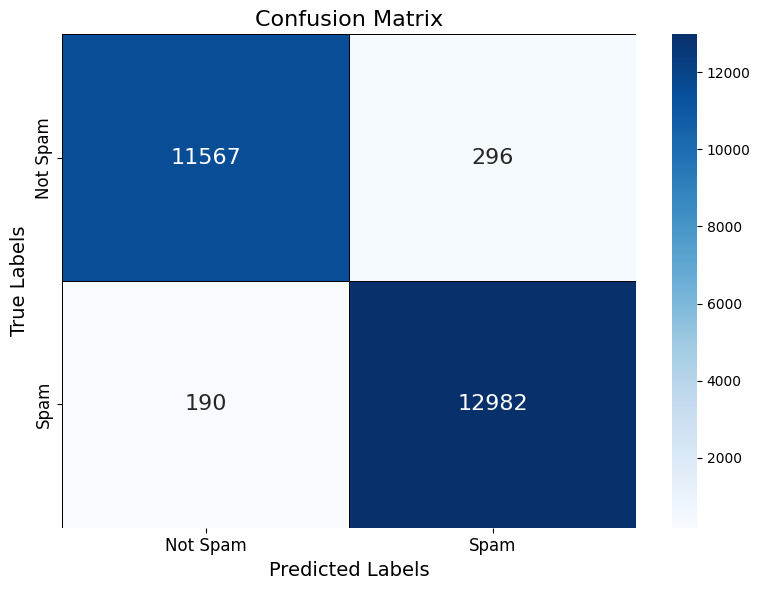

In [36]:
# Create the confusion matrix plot
fig, ax = plt.subplots(figsize=(8, 6))  # Added figsize for better visibility

# Plot the heatmap with proper annotations
sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', ax=ax, cbar=True,
            annot_kws={"size": 16}, linewidths=0.5, linecolor='black')

# Set labels, title, and tick labels
ax.set_xlabel('Predicted Labels', fontsize=14)
ax.set_ylabel('True Labels', fontsize=14)
ax.set_title('Confusion Matrix', fontsize=16)

# Set the x and y axis ticks to reflect spam classification labels
ax.xaxis.set_ticklabels(['Not Spam', 'Spam'], fontsize=12)
ax.yaxis.set_ticklabels(['Not Spam', 'Spam'], fontsize=12)

# Adjust layout to avoid label clipping
plt.tight_layout()

# Display the plot
plt.show()

### 4. Actionable Next Steps
- Regularly test the model on fresh, unseen data to evaluate its generalization to real-world scenarios.
- Incorporate user feedback and periodic retraining with new data to adapt to evolving spam trends.
- Explore advanced techniques, such as ensemble models or attention mechanisms, for potential performance gains.

By leveraging these metrics and tools, we can systematically evaluate and improve the model, ensuring its effectiveness in detecting spam emails.

### Summary 📚

In this notebook, a spam detection model was built using various techniques such as tokenization, feature engineering, and a Bi-LSTM model. The process involved converting text data into tokens, adding features, and training the model to detect spam emails effectively.

These approaches and concepts can be extended to other real-world applications, including:
- Building chatbots 🤖
- Text summarization ✂️
- Language translation models 🌍
- Detecting large language models (LLM) 🔍